In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

In [135]:
class DR(object):
    def __init__(self, name, omega_eq, delta_omega, delta_omega_err, ref, symbol='.'):
        self.name = name
        self.omega_eq = omega_eq
        self.delta_omega = delta_omega
        self.delta_omega_err = delta_omega_err
        self.ref = ref
        self.symbol = symbol
        
    @property
    def alpha(self):
        return (self.delta_omega * u.rad / u.day) / (self.omega_eq * u.rad / u.day)
        
    @property
    def alpha_err(self):
        return (self.prot / (2 * np.pi) * self.delta_omega_err).value
    
    @property
    def prot(self):
        return 2 * np.pi * u.rad / (self.omega_eq * u.rad / u.day)
        
    def __repr__(self): 
        return f"<{self.name}, {self.ref}>"

In [142]:
abdor_delta_omegas = [0.046, 0.091, 0.088, 0.066, 0.071, 0.057, 0.053, 0.047, 0.058, 0.046, 0.054]

drs = [
    DR("Sun", omega_eq=0.25132741, delta_omega=0.05, 
       delta_omega_err=0, ref='--', symbol='o'),
    DR("R58", omega_eq=11.20, delta_omega=0.14, 
       delta_omega_err=0.015, ref='Marsden 2005'),
    DR("R58", omega_eq=11.20, delta_omega=0.025, 
       delta_omega_err=0.015, ref='Marsden 2005'),
    DR("LQ Lup", omega_eq=20.28, delta_omega=0.15,
       delta_omega_err=0.020, ref='Donati 2000'),
    DR("PZ Tel", omega_eq=6.650, delta_omega=0.101,
       delta_omega_err=0.00654, ref='Barnes 2005b'),
    DR("Speedy Mic", omega_eq=16.534, delta_omega=0.03157,
       delta_omega_err=0.002, ref='Barnes 2005b'),
    DR("LQ Hya", omega_eq=3.9253716, delta_omega=0.19420, 
       delta_omega_err=0.02160, ref='Donati 2000'),
    DR("LQ Hya", omega_eq=3.9253716, delta_omega=0.01440,
       delta_omega_err=0.02160, ref='Donati 2000'),
    DR("LO Peg", omega_eq=14.86, delta_omega=0.034714, 
       delta_omega_err=0.00682, ref='Barnes 2005a'),
    DR("HK Aqr", omega_eq=14.57, delta_omega=0.00496,
       delta_omega_err=0.00917, ref='Barnes 2004')
] + [DR("AB Dor", omega_eq=12.2434, delta_omega=ado, delta_omega_err=0.01, ref='Cameron 2002') for ado in abdor_delta_omegas]

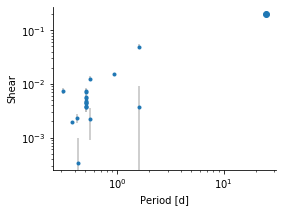

In [147]:
fig, ax = plt.subplots(figsize=(4, 3))
for dr in drs: 
    ax.errorbar(dr.prot.value, dr.alpha, 
                dr.alpha_err, fmt=dr.symbol, ecolor='silver')
ax.set(xscale='log', yscale='log', 
       xlabel='Period [d]', ylabel='Shear')

for sp in ['right', 'top']:
    ax.spines[sp].set_visible(False)

fig.savefig('plots/shears.png', dpi=250)